In [69]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face-Mask detection dataset

In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with  ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")


The dataset is extracted


In [10]:
!ls

data  face-mask-dataset.zip  kaggle.json  masked.webp  sample_data


Importing the dependancies

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')

In [14]:
print('Number of with mask images', len(with_mask_files))
print('Number of without mask images', len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


Creating labels for 2 class of images

with_mask -> 1
without_mask -> 0

In [15]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828



In [16]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [17]:
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [18]:
labels = with_mask_labels + without_mask_labels

In [19]:
print(len(labels))

7553


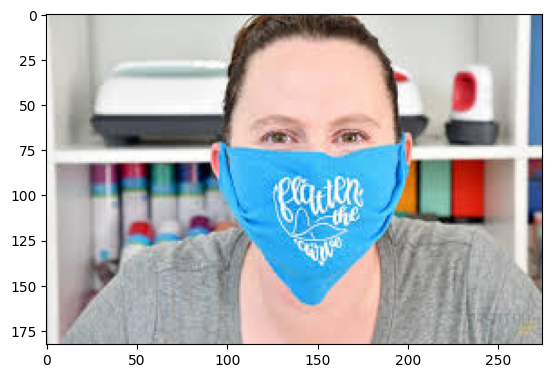

In [20]:
#displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2690.jpg')
imgplot = plt.imshow(img)
plt.show()

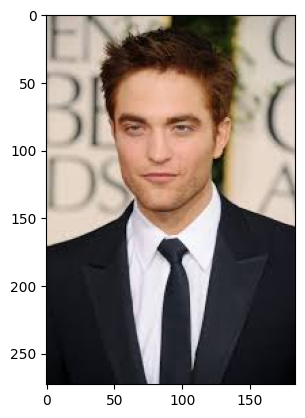

In [21]:
#displaying without mask images

img = mpimg.imread('/content/data/without_mask/without_mask_2690.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing:

1. Resize the images
2. Converting images into numpy arrays

In [26]:
with_mask_path = "/content/data/with_mask"
data = []

for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128, 128)).convert('RGB')  # Resize and convert to RGB in a single line
    image = np.array(image)
    data.append(image)


without_mask_path = "/content/data/without_mask"

for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128, 128)).convert('RGB')  # Resize and convert to RGB in a single line
    image = np.array(image)
    data.append(image)

In [27]:
type(data)

list

In [28]:
len(data)

7553

In [29]:
data[0]

array([[[136, 107,  79],
        [136, 106,  82],
        [132, 102,  76],
        ...,
        [ 34,  28,  17],
        [ 55,  44,  26],
        [ 75,  59,  38]],

       [[131, 105,  79],
        [132, 104,  79],
        [133, 105,  79],
        ...,
        [ 25,  19,  11],
        [ 38,  28,  14],
        [ 73,  59,  41]],

       [[132, 105,  77],
        [132, 105,  78],
        [135, 109,  84],
        ...,
        [ 22,  18,  14],
        [ 29,  21,  13],
        [ 59,  48,  35]],

       ...,

       [[177, 175, 180],
        [175, 173, 179],
        [174, 172, 177],
        ...,
        [173, 164, 167],
        [174, 168, 168],
        [174, 168, 168]],

       [[177, 174, 181],
        [177, 174, 181],
        [177, 174, 181],
        ...,
        [174, 165, 171],
        [174, 168, 170],
        [174, 168, 168]],

       [[177, 174, 183],
        [177, 174, 183],
        [177, 174, 183],
        ...,
        [175, 166, 172],
        [175, 169, 171],
        [175, 169, 169]]

In [30]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(128, 128, 3)

In [32]:
X = np.array(data)
Y = np.array(labels)

In [33]:
type(X)
type(Y)

numpy.ndarray

In [34]:
print(X.shape, Y.shape)

(7553, 128, 128, 3) (7553,)


Train-Test Split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
#scaling of data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [38]:
X_train_scaled[0]

array([[[0.14117647, 0.10196078, 0.16470588],
        [0.14117647, 0.10588235, 0.16862745],
        [0.14901961, 0.11372549, 0.17647059],
        ...,
        [0.2       , 0.16078431, 0.23137255],
        [0.2       , 0.15686275, 0.22352941],
        [0.2       , 0.15686275, 0.22352941]],

       [[0.14509804, 0.10588235, 0.16862745],
        [0.14509804, 0.10980392, 0.17254902],
        [0.14901961, 0.11764706, 0.18039216],
        ...,
        [0.20784314, 0.16862745, 0.24313725],
        [0.20784314, 0.16862745, 0.23529412],
        [0.20784314, 0.16862745, 0.23529412]],

       [[0.14509804, 0.10980392, 0.17647059],
        [0.14509804, 0.11372549, 0.18039216],
        [0.14901961, 0.1254902 , 0.18823529],
        ...,
        [0.21568627, 0.17647059, 0.25490196],
        [0.21960784, 0.18039216, 0.25098039],
        [0.21960784, 0.18039216, 0.25098039]],

       ...,

       [[0.10980392, 0.05882353, 0.11764706],
        [0.10980392, 0.05882353, 0.11764706],
        [0.11764706, 0

**Building CNN**

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())  # Correct the case of 'Flatten'

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0,5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0,5))



model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [41]:
model.compile(optimizer='adam',  # Correct 'optimize' to 'optimizer'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Correct 'matrices' to 'metrics' and use 'accuracy'


In [42]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Epoch 1/5
170/170 [==============================] - 7s 21ms/step - loss: 0.3819 - accuracy: 0.8540 - val_loss: 0.3872 - val_accuracy: 0.8479
Epoch 2/5
170/170 [==============================] - 3s 15ms/step - loss: 0.1894 - accuracy: 0.9288 - val_loss: 0.2281 - val_accuracy: 0.9190
Epoch 3/5
170/170 [==============================] - 3s 15ms/step - loss: 0.1110 - accuracy: 0.9577 - val_loss: 0.2629 - val_accuracy: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 15ms/step - loss: 0.0693 - accuracy: 0.9744 - val_loss: 0.2757 - val_accuracy: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.0399 - accuracy: 0.9864 - val_loss: 0.3574 - val_accuracy: 0.9074


Model Evaluation

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy : ", accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3196 - accuracy: 0.9193
Test Accuracy :  0.9192587733268738


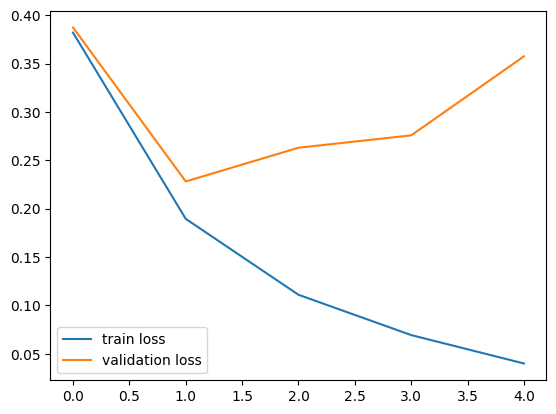

In [44]:
h = history

#plot loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

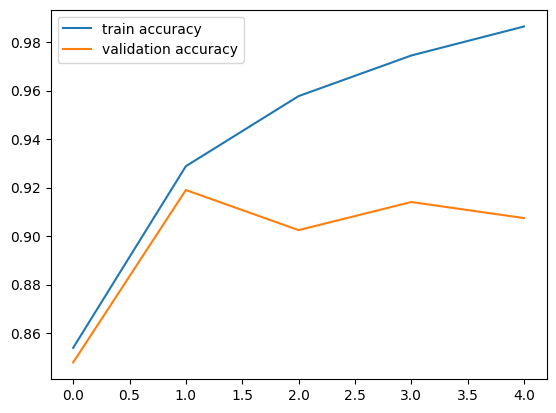

In [45]:
#plot accuracy value

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**PREDICTIONS**

path of the image to be predicted: /content/masked.webp


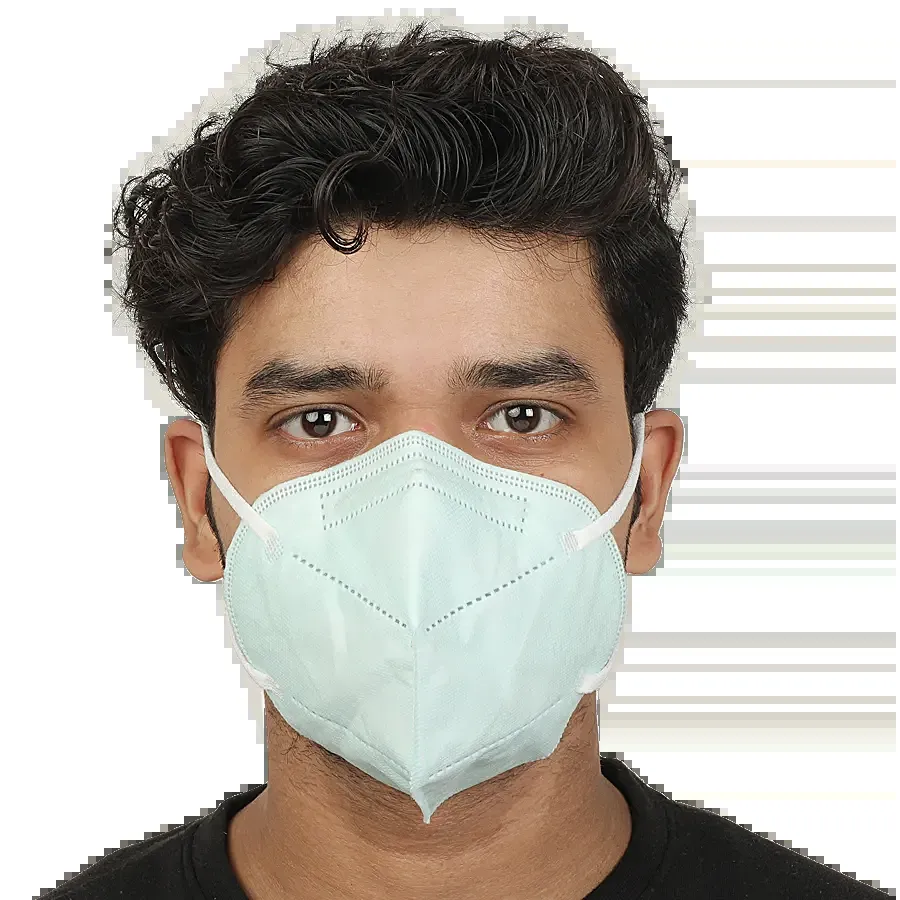

1/1 [==============================] - 0s 344ms/step
[[0.5106116 0.9619363]]
The person in the image is wearing a mask


In [47]:
from google.colab.patches import cv2_imshow

input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Display the image using 'cv2_imshow' from Google Colab patches
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
